In [47]:
!python3 -m pip install powerlaw

In [48]:
#import igraph as ig
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from itertools import islice
from tqdm import tqdm
import os
from random import sample
import scipy.stats as stats
import powerlaw
import scipy
import numpy.polynomial.polynomial as poly
from matplotlib.lines import Line2D


In [49]:
## Matplotlib defaults ##
colors = {"1980": "#aa0f35", 
         "1985": "#fdc799",
         "1990": "#abdbfc",
         "1995": "#a0a75c",
         "2000": "#603734",
         "2005": "#009ecb",
         "2010": "#430057",
         "2015": "#f89b00"}

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rcParams.update({'font.size': 22})

# Degree Analysis

Compare degree distributions & other degree-based stats

## Degree distributions

Comparisons of degree distributions across months

In [82]:
### Isolate compound degrees

degrees = pickle.load(file=open("Data/Degrees/Months/degrees_1984-12.p", "rb"))
print(type(degrees))

print(len(degrees))
print(degrees[0:10])
degrees.sort()
print(degrees[0:10])

print(max(degrees))


degrees = [1 if deg == 0 else deg for deg in degrees]
print(degrees[1000:1010])
print(len(degrees))

<class 'list'>
37471
[47, 46, 91, 312, 960, 916, 900, 112, 960, 141]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
19597
[7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
37471


In [83]:
#TESTING - get one month working
cpd_degrees = pickle.load(file=open("Data/Degrees/Months/cpd_degrees_1984-12.p", "rb"))
#patent_degrees = pickle.load(file=open("Data/Degrees/patent_degrees_1980-01.p", "rb"))

print(max(cpd_degrees))
print(type(cpd_degrees))
print(cpd_degrees[0:10])
print(len(degrees))
cpd_degrees.sort()

print(cpd_degrees[1000:1010])

596829
<class 'list'>
[1, 3, 1, 3, 84, 5, 2, 1, 5, 6]
37471
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [84]:
degrees == cpd_degrees

False

In [9]:
#Bastic stats
print(stats.describe(cpd_degrees))
# print()
# print(stats.describe(patent_degrees))

DescribeResult(nobs=1086973, minmax=(1, 596829), mean=163.91963553832525, variance=11524260.149667004, skewness=70.59783003389202, kurtosis=7460.926155671175)


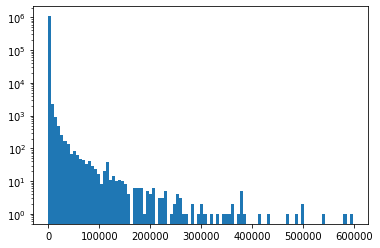

In [10]:
plt.hist(cpd_degrees, bins=100)
plt.yscale("log")

plt.show()

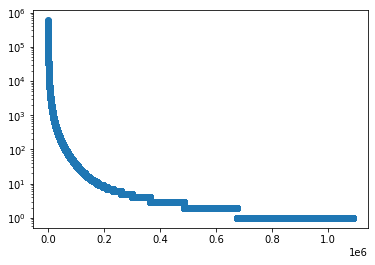

In [11]:
cpd_degrees.sort(reverse=True)

plt.scatter(np.arange(0,len(cpd_degrees),1), cpd_degrees)
plt.yscale("log")

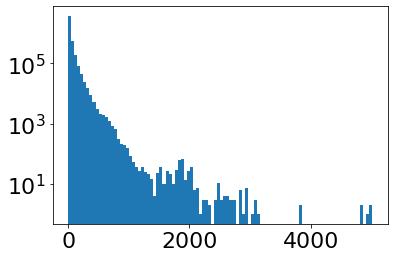

In [15]:
# plt.hist(patent_degrees, bins=100)
# plt.yscale("log")

# plt.show()

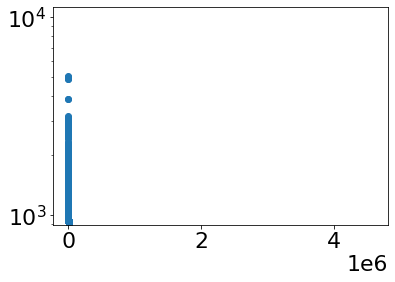

In [37]:
patent_degrees.sort(reverse=True)

plt.scatter(np.arange(0,len(patent_degrees),1), patent_degrees)
plt.yscale("log")

### Powerlaw Testing

In [5]:
#Powerlaw testing
fit = powerlaw.Fit(cpd_degrees, xmin=min(cpd_degrees))
print(fit)

In [6]:
print(fit.power_law.alpha)
print(fit.power_law.sigma)
print(fit.power_law.xmin)

#NOTE: positive R = first fit is better. Negative R = second fit is better. p is the significance in either case.
R, p = fit.distribution_compare('power_law', 'exponential')
print(R, p)
R, p = fit.distribution_compare('power_law', 'lognormal')
print(R, p)

1.8098984392553255
0.0007768214048485602
1.0
3964938.2681132415 0.0


Text(0, 0.5, 'Probability')

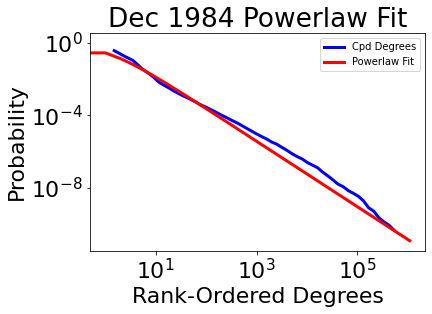

In [15]:
powerlaw.plot_pdf(cpd_degrees, color='b', linewidth=3, label="Cpd Degrees")
plt.plot(np.arange(1,len(cpd_degrees))**(-fit.power_law.alpha), color='r', linewidth=3, label="Powerlaw Fit")
#fit.plot_pdf(color='r')

plt.legend(prop={"size":10})
plt.title("Dec 1984 Powerlaw Fit")
plt.xlabel("Rank-Ordered Degrees")
plt.ylabel("Probability")

In [45]:
#Function to calculate & plot powerlaw fits
def powerlaw_fit(month, ax, c):
    cpd_degrees = pickle.load(file=open("Data/Degrees/Months/cpd_degrees_" + month + ".p", "rb"))
    fit = powerlaw.Fit(cpd_degrees, xmin=min(cpd_degrees))

    alpha = fit.power_law.alpha
    sigma = fit.power_law.sigma
    xmin = fit.power_law.xmin

    #NOTE: positive R = first fit is better. Negative R = second fit is better. p is the significance in either case.
    R_exp, p_exp = fit.distribution_compare('power_law', 'exponential')
    #R_lgn, p_lgn = fit.distribution_compare('power_law', 'lognormal')

    print(month + "," + str(alpha) + "," + str(sigma) + "," + str(xmin) + "," + str(R_exp) + "," + str(p_exp))
    
    
    powerlaw.plot_pdf(cpd_degrees, color=c, linewidth=5, label="Cpd Degrees", ax=ax)
    ax.plot(np.arange(1,len(cpd_degrees))**(-fit.power_law.alpha), color='k', linewidth=3, linestyle="--", label="Powerlaw Fit")
    #fit.plot_pdf(color='r')

    ax.title.set_text("Dec " + month[0:4]) #Sets title of subplots

1984-12,1.8098984392553255,0.0007768214048485602,1.0,3964938.2681132415,0.0
1989-12,1.856175685801595,0.0006501051785638486,1.0,5857216.654057463,0.0
1994-12,1.8686626415436887,0.0005455844592409398,1.0,7828779.997514958,0.0
1999-12,1.8644992458316199,0.00045803092520567927,1.0,9929113.349558355,0.0
2004-12,1.7958923711688277,0.00034285261238216954,1.0,12161916.291864,0.0
2009-12,1.7734056209402471,0.00025164254345096034,1.0,16352054.541457333,0.0
2014-12,1.7905015735106784,0.00021279489120068075,1.0,20427204.437219955,0.0
2019-12,1.8935210486159237,0.0002074850072327997,1.0,27602685.785574667,0.0


Text(0.5, 0.98, 'Compound Degree PowerLaw Fits')

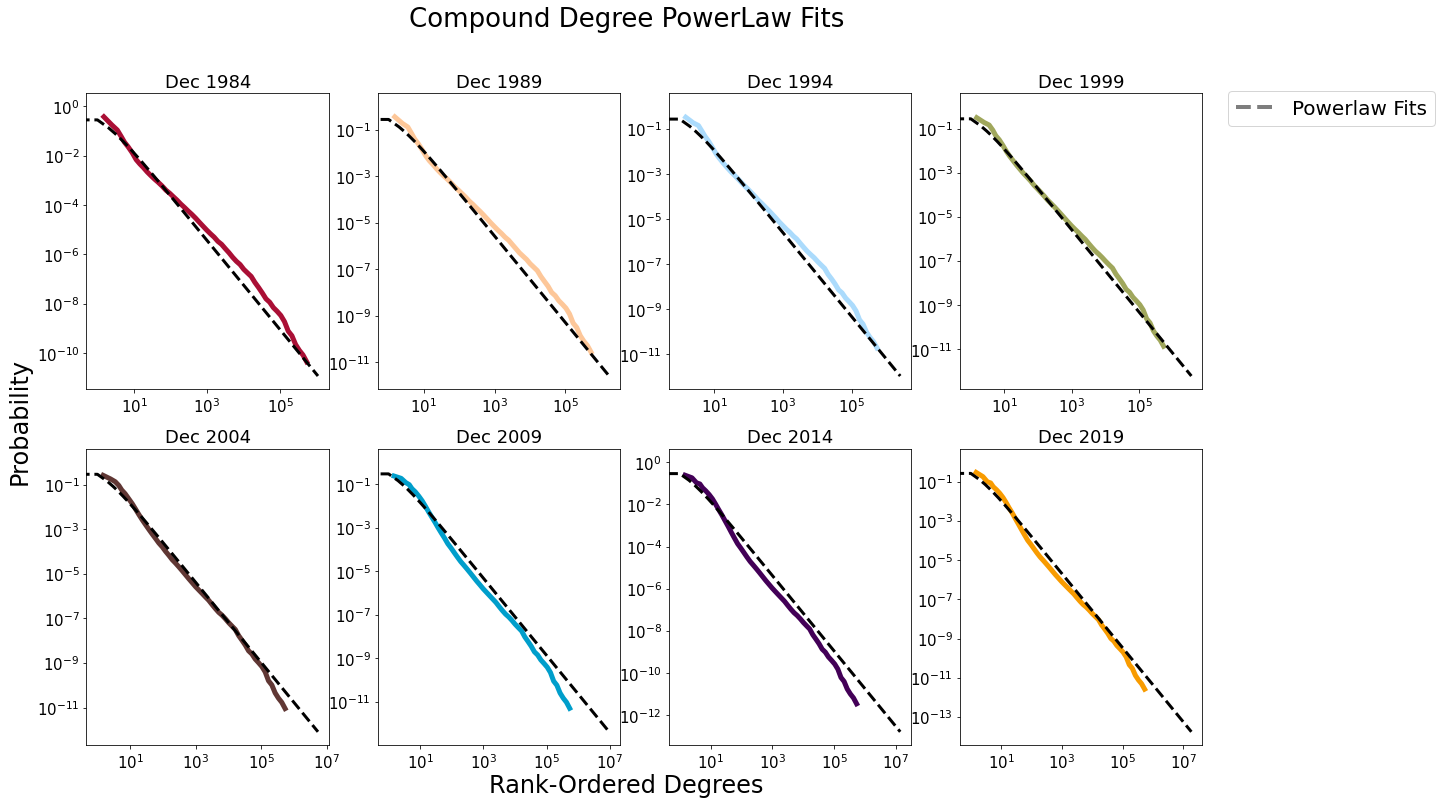

In [85]:
# Plotting all powerlaw fits on a single figure - same style as in pref_attachment_noNetworks.ipynb
plt.rcParams.update({'font.size': 15})

fig = plt.figure(figsize=(20,12))
axes = [fig.add_subplot(241), fig.add_subplot(242), fig.add_subplot(243),
    fig.add_subplot(244), fig.add_subplot(245), fig.add_subplot(246),
    fig.add_subplot(247), fig.add_subplot(248)]
    
months = ["1984-12", "1989-12", "1994-12", "1999-12", "2004-12", "2009-12", "2014-12", "2019-12"]
increments = ["1980", "1985", "1990", "1995", "2000", "2005", "2010", "2015"] #Beginning of 5-year section, necesssary for colors

for i in range(len(months)):
    powerlaw_fit(months[i], axes[i], colors[increments[i]])

#ax.title("Dec 1984 Powerlaw Fit")
fig.text(0.5, 0.07, "Rank-Ordered Degrees", ha="center", size=24)
fig.text(0.07, 0.5, "Probability", va="center", rotation="vertical", size=24)

plt.legend([Line2D([0], [0], color='k', alpha=0.5, lw=4, linestyle="dashed")], ["Powerlaw Fits"], bbox_to_anchor=[2.0,2.24], prop={"size":20})
fig.suptitle("Compound Degree PowerLaw Fits", fontsize=26)

# Network Statistics

One graph (at least an attempt) to include:
- Total Cpds
- New Cpds
- Avg Cpd Degree
- Total Patents (TBD)
- New Patents (TBD)
- Avg Patent Degree (TBD)

In [11]:
df = pd.read_csv("Data/NetworkStats/networkStats_byMonth.csv")

#Go through Dec 31 2019 to fit patent data
df = df[df["month"] < "2020-01"]

lcc_df = pd.read_csv("Data/NetworkStats/lcc_stats.csv")

patent_df = pd.read_csv("Data/NetworkStats/patent_stats.csv")

patent_avg_degree_df = pd.read_csv("Data/NetworkStats/patent_avg_degree.csv")

#Edit patents to fit 1980-2020 range
patent_df = patent_df[patent_df["month"] >= "1980-01"]
patent_df = patent_df[patent_df["month"] < "2020-01"]

#Sort avg degree df, and add it to patent_df
patent_avg_degree_df = patent_avg_degree_df.sort_values("month")
patent_df["AvgPatentDegree"] = patent_avg_degree_df["AvgDegree"].tolist()

print(df.head())
print("-------------------------------------")
print(lcc_df.head())
print("-------------------------------------")
print(patent_df.head())

     month  Unnamed: 0    Nodes      Edges  Cpd Nodes  Patent Nodes  \
0  1980-01           0  5130181  159501777     551235       4578946   
1  1980-02           0  5139634  159977594     560688       4578946   
2  1980-03           0  5146304  160406332     567358       4578946   
3  1980-04           0  5158307  161066225     579361       4578946   
4  1980-05           0  5165540  161369400     586594       4578946   

   Avg Degree  Cpd Avg Degree  Patent Avg Degree  LCC Size  
0   62.181735      289.353501          34.833732   5035294  
1   62.252524      285.323734          34.937646   5045106  
2   62.338460      282.725073          35.031278   5052457  
3   62.449259      278.006675          35.175393   5065285  
4   62.479199      275.095552          35.241604   5073025  
-------------------------------------
   Unnamed: 0    month  newIds  newIds_newLCC  newIds_nonLCC  oldIds_newLCC  \
0           0  1980-02    9453           9812             80            439   
1          

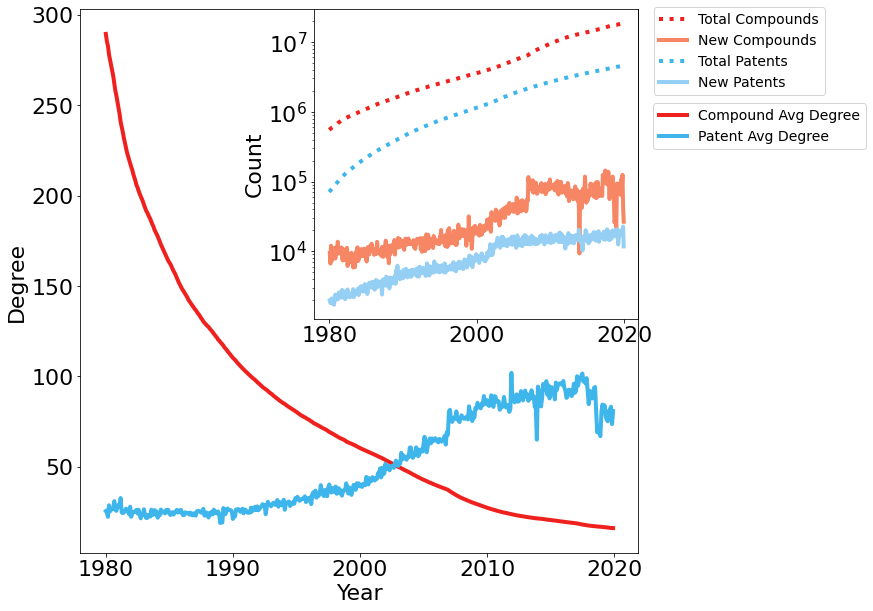

In [25]:
fig, ax1 = plt.subplots(figsize=(10,10))

#Compounds are all shades of red, patents are shades of blue
#Dark = total, mid = new, light = degree
colors = {"TotalCpds": "#EF211E", 
         "NewCpds": "#F78664",
         "CpdDegree": "#EF211E",
         "TotalPatents": "#3EB6EC",
         "NewPatents": "#95D0F4",
         "PatentDegree": "#3EB6EC",
         }

xs = np.arange(1980, 2020, 1/12)

ln1 = ax1.plot(xs, df["Cpd Avg Degree"], linewidth=4, label="Compound Avg Degree", 
               color=colors["CpdDegree"])
ln6 = ax1.plot(xs, patent_df["AvgPatentDegree"], linewidth=4, label="Patent Avg Degree", 
               color=colors["PatentDegree"])

#ax2 = ax1.twinx()
ax2 = fig.add_axes([0.45,0.45,0.45,0.43]) #left, bottom, width, height coordinates
ln2 = ax2.plot(xs, df["Cpd Nodes"], linewidth=4, label="Total Compounds", color=colors["TotalCpds"],
              linestyle="dotted",)
ln3 = ax2.plot(xs[1:], lcc_df["newIds"].tolist(), linewidth=4, label="New Compounds", color=colors["NewCpds"])

ln4 = ax2.plot(xs, patent_df["totalPatents"], linewidth=4, label="Total Patents", 
               linestyle="dotted", color=colors["TotalPatents"])
ln5 = ax2.plot(xs[1:], patent_df["newPatents"].tolist()[:-1], linewidth=4, label="New Patents", 
                color=colors["NewPatents"])

ax2.set_yscale("log")

# lns = ln2 + ln3 + ln4 + ln5 + ln1 + ln6
# labels = [l.get_label() for l in lns]
# ax1.legend(lns, labels, prop={"size":14}, bbox_to_anchor=(1.5, 1.02))
ax1.legend(prop={"size":14}, bbox_to_anchor=(1.42, 0.84)) #Degrees
ax2.legend(prop={"size":14}, bbox_to_anchor=(1.025, 1.03)) #Total/new compounds

ax1.set_xlabel("Year")
ax1.set_ylabel("Degree")
ax2.set_ylabel("Count")

plt.show()

## Exponential Growth testing

Test if the number of total compounds & patents increases exponentially over time

[array([9802010.44490538]), 2, array([1.41421002, 0.00316484]), 1.0658141036401503e-13]
r2 = 3.303585935511932e-10


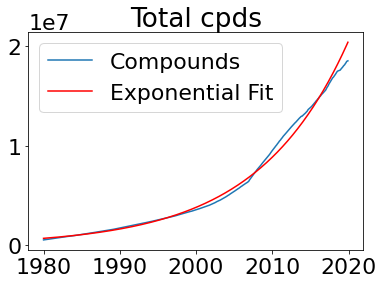

In [68]:
#Compounds
cpds = np.array(df["Cpd Nodes"])

#From https://stackoverflow.com/questions/58986593/np-poly1d-how-to-calculate-r2

fit, stats = poly.polyfit(xs, np.log(cpds), 1, w=np.sqrt(cpds), full=True)
print(stats)
#stats[0][0] is the SSR, r2 is SSR / SST
print("r2 =", stats[0][0] / sum(i*i for i in cpds))

plt.plot(xs, cpds, label="Compounds")
plt.plot(xs, np.exp(fit[0]) * np.exp(fit[1]*xs), "r-", label="Exponential Fit")

plt.title("Total cpds")
plt.legend()

[array([10369597.64102465]), 2, array([1.41421035, 0.00301324]), 1.0658141036401503e-13]
r2 = 3.4948806794642645e-10


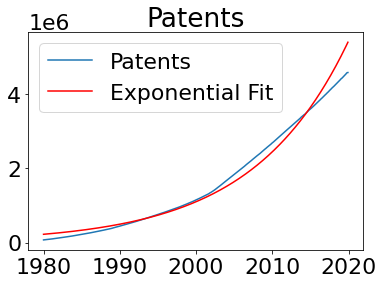

In [69]:
#Patents
patents = np.array(patent_df["totalPatents"])

#From https://stackoverflow.com/questions/58986593/np-poly1d-how-to-calculate-r2

fit, stats = poly.polyfit(xs, np.log(patents), 1, w=np.sqrt(patents), full=True)
print(stats)
#stats[0][0] is the SSR, r2 is SSR / SST
print("r2 =", stats[0][0] / sum(i*i for i in cpds))

plt.plot(xs, patents, label="Patents")
plt.plot(xs, np.exp(fit[0]) * np.exp(fit[1]*xs), "r-", label="Exponential Fit")

plt.title("Patents")
plt.legend()

## LCC Analysis

Which IDs are present, do they change over time, etc...

*Note:* the lcc_ids file holds *all* clusters. The 0th element holds the largest connected component ids.

In [52]:
lcc_ids_0 = pickle.load(file=open("Data/NetworkStats/lcc_ids_1980-01.p", "rb"))
lcc_ids_1 = pickle.load(file=open("Data/NetworkStats/lcc_ids_1980-02.p", "rb"))
lcc_ids_2 = pickle.load(file=open("Data/NetworkStats/lcc_ids_1980-03.p", "rb"))

**Q1:** How do lcc ids change over time? 

- How do new ids incoporate themselves into the LCC?
- Is there a common percentage added each month?
- Do compounds leave the LCC? (probably unlikely, but worth checking)
- Do compounds originally outside the LCC (not new compounds) get added in?

//TODO (for later): find new ids (data is there, but not explicit) for each month

In [53]:
print("LCC size 0:", len(lcc_ids_0[0]))
print("LCC size 1:", len(lcc_ids_1[0]))
print("LCC size 2:", len(lcc_ids_2[0]))

LCC size 0: 5035294
LCC size 1: 5045106
LCC size 2: 5052457


In [54]:
#Testing
new_ids = list(set(lcc_ids_1[0]) - set(lcc_ids_0[0]))
print("New id size, 0-1:", len(new_ids))

new_ids = list(set(lcc_ids_2[0]) - set(lcc_ids_1[0]))
print("New id size, 1-2:", len(new_ids))

new_ids = list(set(lcc_ids_2[0]) - set(lcc_ids_0[0]))
print("New id size, 0-2:", len(new_ids))

New id size, 0-1: 9812
New id size, 1-2: 7351
New id size, 0-2: 17163


In [55]:
#Find how many newly seen ids are added to the LCC
#1 - build list of all ids seen so far
#2 - find new ids (& save them!)
#3 - percentage of new ids that are added to LCC 

allIds = list(set([id for sublist in lcc_ids_0 for id in sublist]))
lccIds = lcc_ids_0[0]
print(len(allIds))
print(len(lccIds))

5130181
5035294


In [56]:
#All new IDs that month
newIds = list(set([id for sublist in lcc_ids_1 for id in sublist]) - set(allIds))
print(len(newIds)) #TODO: SAVE THESE

#All new LCC IDs that month
newlccIds = list(set(lcc_ids_1[0]) - set(lccIds))
print(len(newlccIds)) #TODO: Save these as well

#Existing compounds which were added to LCC
existing_newlccIds = list(set(newlccIds) - set(newIds))
print(len(existing_newlccIds))

9453
9812
439


In [57]:
# (3) How many of these new ids are in lcc
nonlcc_newIds = list(set(newIds) - set(lcc_ids_1[0])) #Finds the newIds which ARE NOT in the LCC
print("New ids not in LCC:", len(nonlcc_newIds))
print("New ids in LCC:", len(newIds) - len(nonlcc_newIds))
print("Percentage:", float(len(nonlcc_newIds)) / len(newIds))

#How many new LCC ids are NOT new ids?
print("Old compounds joining LCC:", len(existing_newlccIds))
print("Percentage of old compounds joining LCC:", float(len(existing_newlccIds)) / (len(allIds) - len(lccIds)))

New ids not in LCC: 80
New ids in LCC: 9373
Percentage: 0.008462921823759652
Old compounds joining LCC: 439
Percentage of old compounds joining LCC: 0.004626555797949139


In [58]:
allIds.extend(newIds)
print(len(allIds))

lccIds.extend(newlccIds)
print(len(lccIds))

5139634
5045106


In [62]:
#Testing to ensure this works for following months
newIds = list(set([id for sublist in lcc_ids_2 for id in sublist]) - set(allIds))
print(len(newIds)) #TODO: SAVE THESE

#All new LCC IDs that month
newlccIds = list(set(lcc_ids_2[0]) - set(lccIds))
print(len(newlccIds)) #TODO: Save these as well

#Existing compounds which were added to LCC
existing_newlccIds = list(set(newlccIds) - set(newIds))
print(len(existing_newlccIds))

# (3) How many of these new ids are in lcc
nonlcc_newIds = list(set(newIds) - set(lcc_ids_2[0])) #Finds the newIds which ARE NOT in the LCC
print("New ids not in LCC:", len(nonlcc_newIds))
print("New ids in LCC:", len(newIds) - len(nonlcc_newIds))
print("Percentage of new ids in LCC:", 1 - (float(len(nonlcc_newIds)) / len(newIds)))

#How many new LCC ids are NOT new ids?
print("Old compounds joining LCC:", len(existing_newlccIds))
print("Percentage of old compounds joining LCC:", float(len(existing_newlccIds)) / (len(allIds) - len(lccIds)))

6670
7351
737
New ids not in LCC: 56
New ids in LCC: 6614
Percentage of new ids in LCC: 0.9916041979010495
Old compounds joining LCC: 737
Percentage of old compounds joining LCC: 0.007796631685849696


## LCC Graphing

In [20]:
#Read in all LCC data
lcc_df = pd.read_csv("Data/NetworkStats/lcc_stats.csv")
print(lcc_df)

     Unnamed: 0    month  newIds  newIds_newLCC  newIds_nonLCC  oldIds_newLCC  \
0             0  1980-02    9453           9812             80            439   
1             1  1980-03    6670           7351             56            737   
2             2  1980-04   12003          12828             38            863   
3             3  1980-05    7233           7740             21            528   
4             4  1980-06    7788           9071             53           1336   
..          ...      ...     ...            ...            ...            ...   
474         474  2019-08  107354         107343             11              0   
475         475  2019-09   82939          82930             10              1   
476         476  2019-10  124701         124683             18              0   
477         477  2019-11   42714          42707              8              1   
478         478  2019-12   26514          26513              1              0   

     newIdsinLCC_percentage

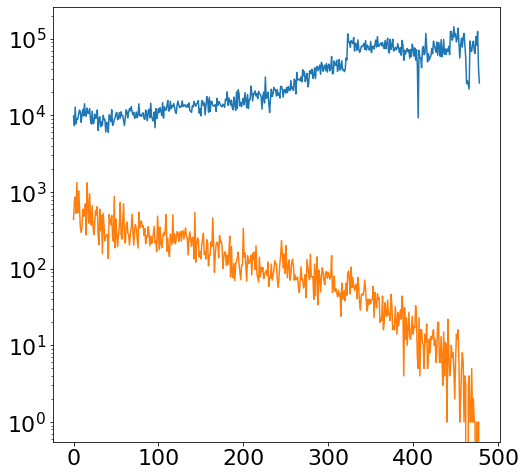

In [25]:
plt.figure(figsize=(8,8))

plt.plot(lcc_df["newIds_newLCC"])
plt.plot(lcc_df["oldIds_newLCC"])

plt.yscale("log")

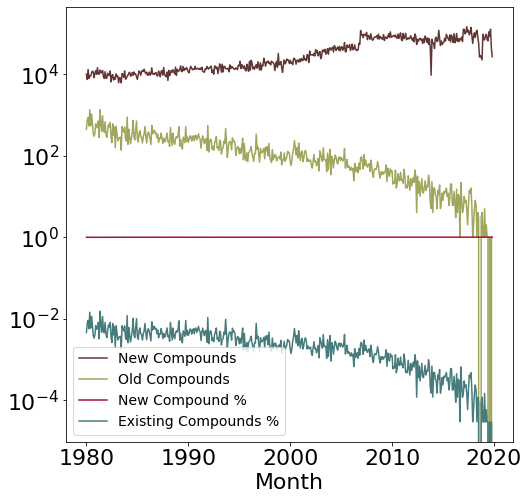

In [27]:
### New compounds added to LCC - either from the set of new compounds or existing compounds

plt.figure(figsize=(8,8))

plt.plot(np.arange(1980, 2020, 1/12)[:-1], lcc_df["newIds_newLCC"], color="#603734", label="New Compounds")
plt.plot(np.arange(1980, 2020, 1/12)[:-1], lcc_df["oldIds_newLCC"], color="#a0a75c", label="Old Compounds")
plt.plot(np.arange(1980, 2020, 1/12)[:-1], lcc_df["newIdsinLCC_percentage"], color="#aa0f35", label="New Compound %")
plt.plot(np.arange(1980, 2020, 1/12)[:-1], lcc_df["oldIdsNewinLCC_percentage"], color="#487c7c", label="Existing Compounds %")

plt.yscale("log")

plt.xlabel("Month")
plt.legend(prop={"size":14})

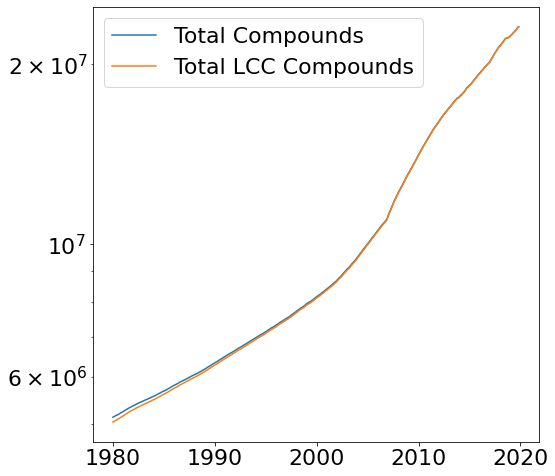

In [29]:
### LCC size vs full amount of compounds (maybe do some percentage differences, but that probably won't be worth it)

plt.figure(figsize=(8,8))

plt.plot(np.arange(1980, 2020, 1/12)[:-1], lcc_df["totalIds"], label="Total Compounds")
plt.plot(np.arange(1980, 2020, 1/12)[:-1], lcc_df["totalLCCIds"], label="Total LCC Compounds")

plt.yscale("log")
plt.legend()